<h1>Regresión Lógistica</h1>

<p>Enfermedades cardíacas de la UCI de Cleveland</p>

<h3>Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [1]:
#Importar las librerias necesarias para la actividad

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cargar dataset
Datos = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# Visualizar los Datos para el análisis exploratorio
Datos.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
#Información general de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
#Identificación de valores duplicados
Datos.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
292    False
293    False
294    False
295    False
296    False
Length: 297, dtype: bool

In [6]:
Datos.duplicated().sum()

0

<h3>Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</h3>

In [7]:
#Modificar los titulo de las columnas
Datos.rename(columns={'age':'Edad','sex':'Sexo','cp':'TipoDolor','trestbps':'PresionArterialReposo','chol':'Colesterol','fbs':'AzucarEnSangre','restecg':'ResultadosElectro','thalach':'FrecuenciaCardiacaMaxima','exang':'AnginaPorEjercicio','oldpeak':'DepresionST','slope':'PendienteST','ca':'NumVasosMayores','thal':'Thal','condition':'Condicion'}, inplace=True)

In [8]:
#Identificar datos faltantes
Datos.isnull().sum()

Edad                        0
Sexo                        0
TipoDolor                   0
PresionArterialReposo       0
Colesterol                  0
AzucarEnSangre              0
ResultadosElectro           0
FrecuenciaCardiacaMaxima    0
AnginaPorEjercicio          0
DepresionST                 0
PendienteST                 0
NumVasosMayores             0
Thal                        0
Condicion                   0
dtype: int64

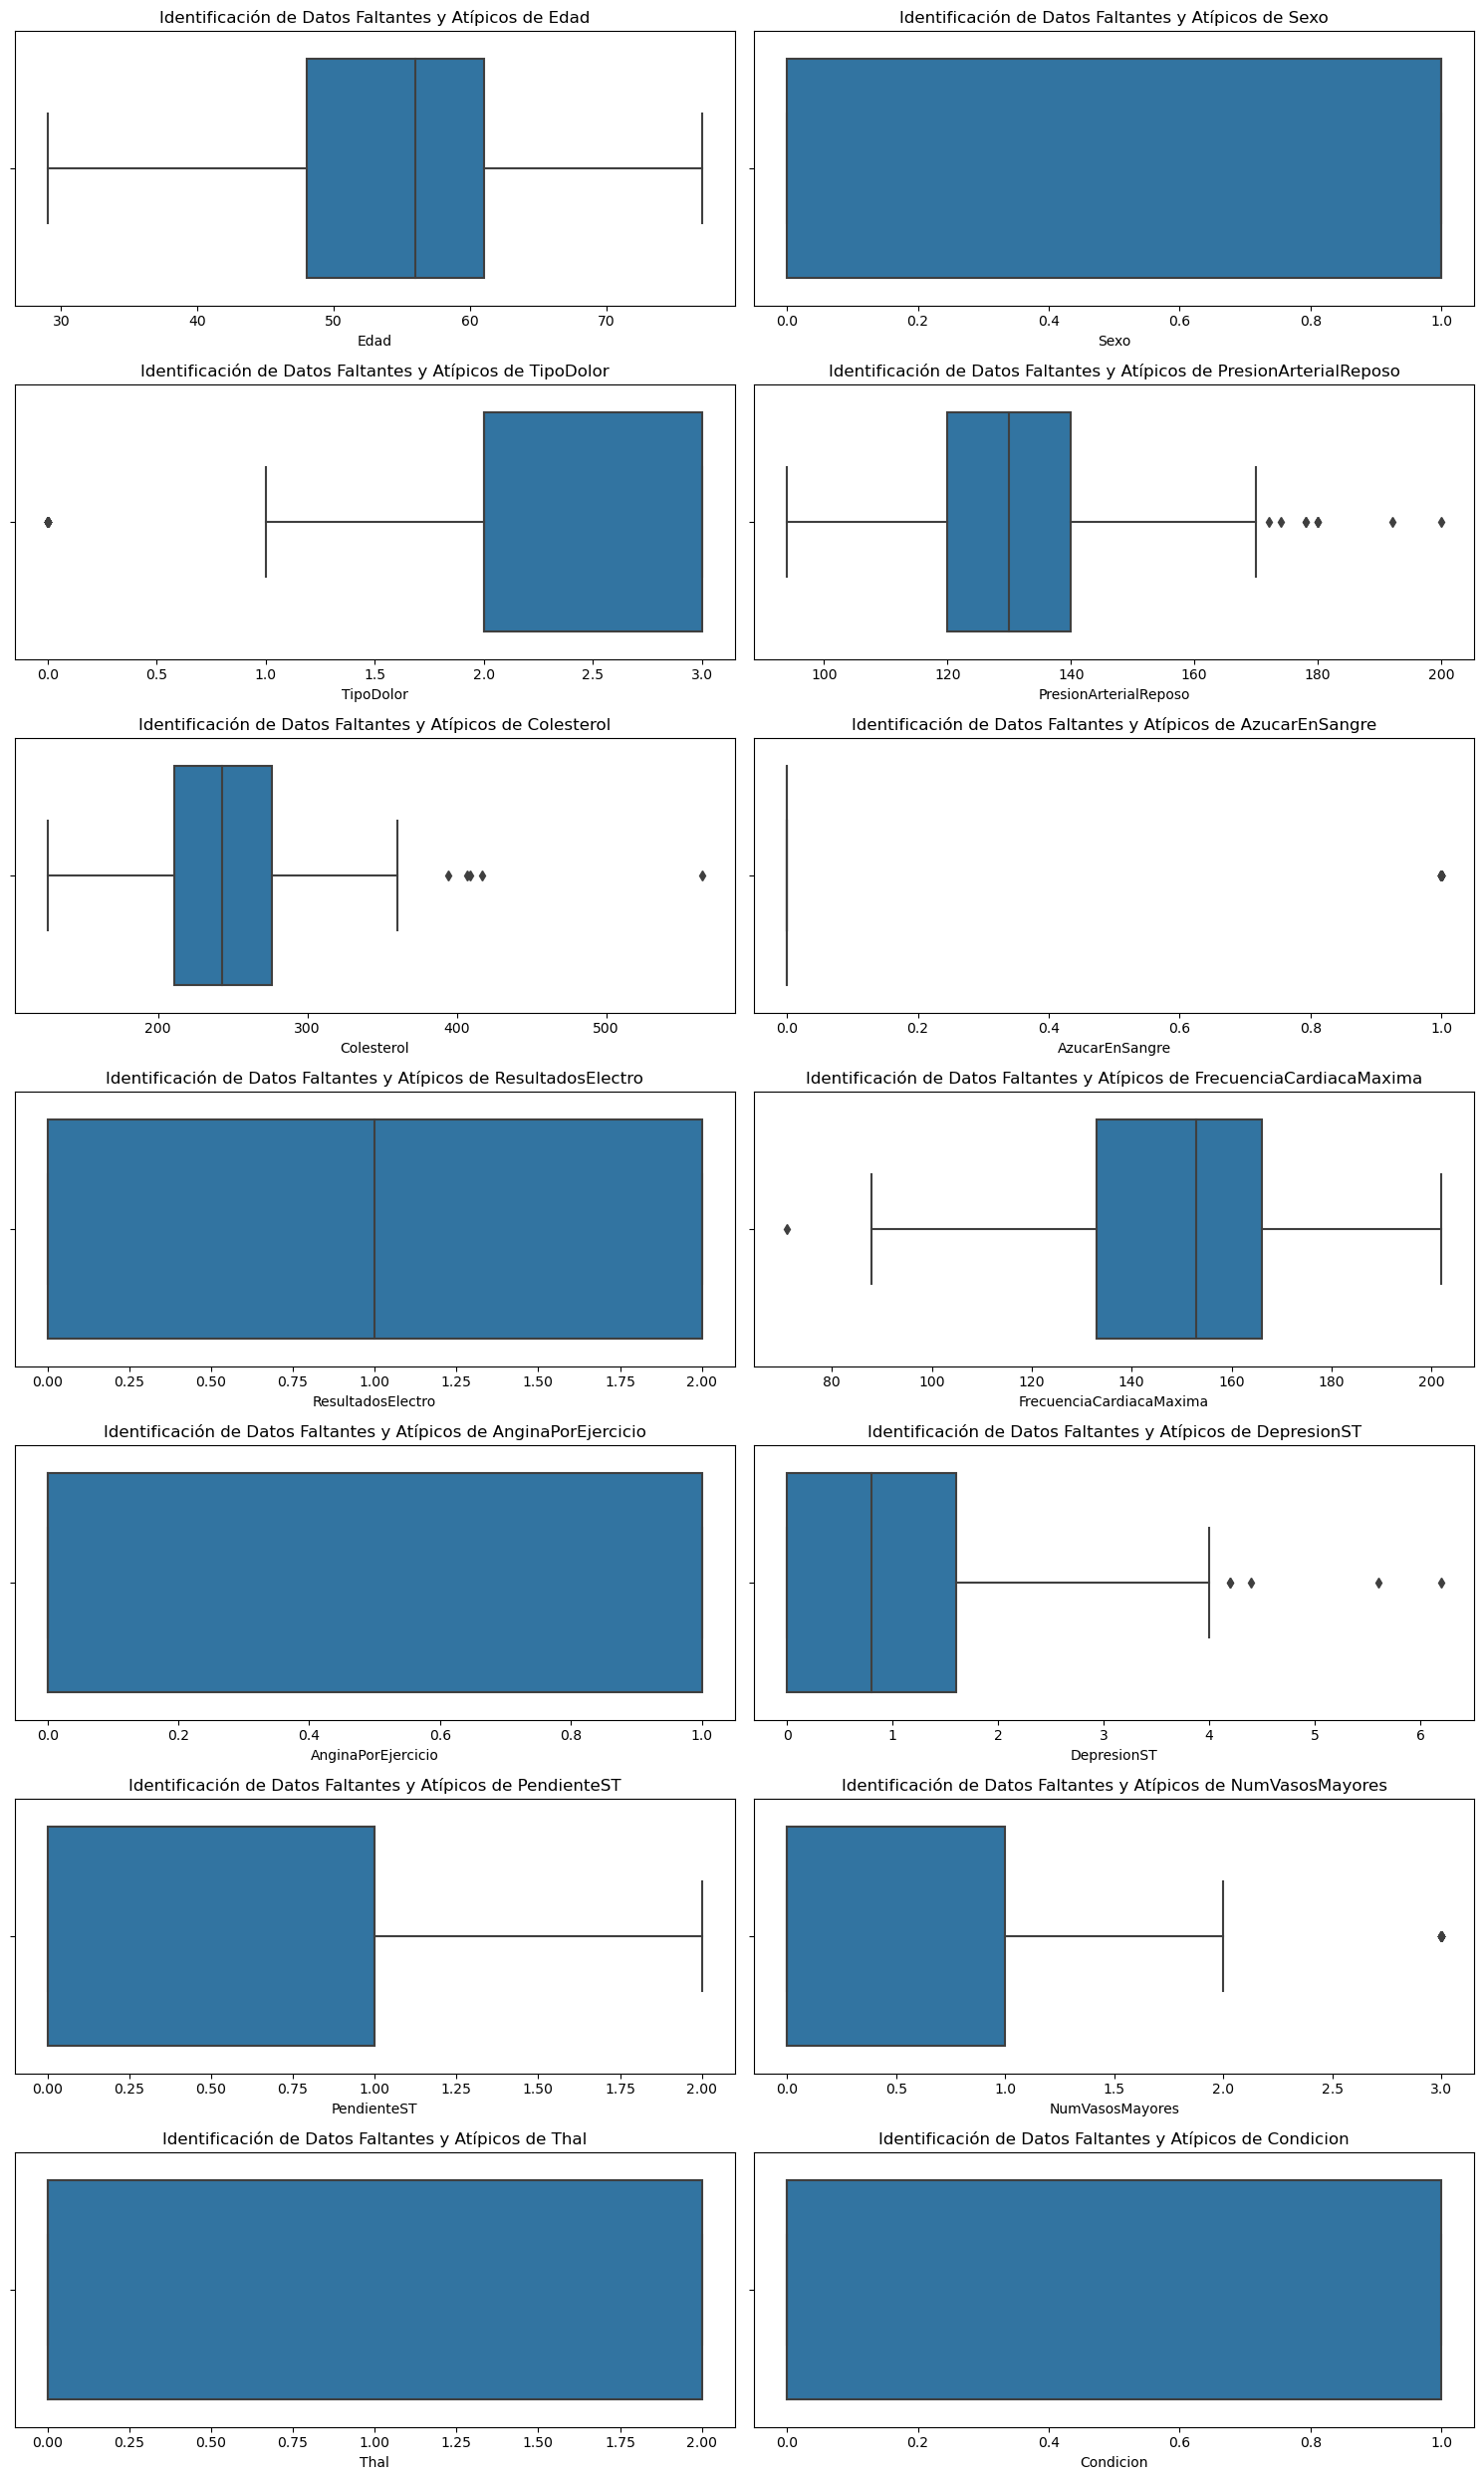

In [9]:
#Identificar Valores Atípicos

plt.figure(figsize=(15, 25))
for i, column in enumerate(Datos.columns):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(x=Datos[column])
    plt.title('Identificación de Datos Faltantes y Atípicos de ' + column)
plt.tight_layout()
plt.show()

In [11]:
#Conteo y eliminación de Datos Atípicos PresionArterial

num_minimo=59
num_maximo=181
Total_Atipicos_PresionA =((Datos['PresionArterialReposo']<num_minimo)|(Datos['PresionArterialReposo']>num_maximo)).sum()
print("El total de datos atípicos de la PresionArteral es {}".format(Total_Atipicos_PresionA))

El total de datos atípicos de la PresionArteral es 2


In [12]:
#Filtrar Datos

Datos=Datos[(Datos['PresionArterialReposo']<num_maximo)&(Datos['PresionArterialReposo']>num_minimo)]

In [13]:
#Validación de eliminación de datos atipicos en Presión Arterial

Total_Atipicos_PresionA =((Datos['PresionArterialReposo']<num_minimo)|(Datos['PresionArterialReposo']>num_maximo)).sum()
print("El total de datos atípicos de la PresionArteral es {}".format(Total_Atipicos_PresionA))

El total de datos atípicos de la PresionArteral es 0


In [15]:
#Conteo y eliminación de Datos Atípicos Colesterol

num_minimo=29
num_maximo=401
Total_Atipicos_Colesterol=((Datos['Colesterol']<num_minimo)|(Datos['Colesterol']>num_maximo)).sum()
print("El total de datos atípicos del Colesterol es {}".format(Total_Atipicos_Colesterol))

Datos=Datos[(Datos['Colesterol']<num_maximo)&(Datos['Colesterol']>num_minimo)]

El total de datos atípicos del Colesterol es 4


In [16]:
#Validación de eliminación de datos atipicos en colesterol

Total_Atipicos_Colesterol=((Datos['Colesterol']<num_minimo)|(Datos['Colesterol']>num_maximo)).sum()
print("El total de datos atípicos del Colesterol es {}".format(Total_Atipicos_Colesterol))

El total de datos atípicos del Colesterol es 0


In [18]:
#Conteo y eliminación de Datos Atípicos Frecuencia cardiaca Máxima

num_minimo=79
num_maximo=203
Total_Atipicos_FrecuenciaCardiaca =((Datos['FrecuenciaCardiacaMaxima']<num_minimo)|(Datos['FrecuenciaCardiacaMaxima']>num_maximo)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca Máxima es {}".format(Total_Atipicos_FrecuenciaCardiaca))

Datos=Datos[(Datos['FrecuenciaCardiacaMaxima']<num_maximo)&(Datos['FrecuenciaCardiacaMaxima']>num_minimo)]

El total de datos atípicos de la Frecuencia cardiaca Máxima es 1


In [19]:
#Validación de eliminación de datos atipicos en Frecuencia cardiaca Máxima

Total_Atipicos_FrecuenciaCardiaca =((Datos['FrecuenciaCardiacaMaxima']<num_minimo)|(Datos['FrecuenciaCardiacaMaxima']>num_maximo)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca Máxima es {}".format(Total_Atipicos_FrecuenciaCardiaca))

El total de datos atípicos de la Frecuencia cardiaca Máxima es 0


In [20]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      290 non-null    int64  
 1   Sexo                      290 non-null    int64  
 2   TipoDolor                 290 non-null    int64  
 3   PresionArterialReposo     290 non-null    int64  
 4   Colesterol                290 non-null    int64  
 5   AzucarEnSangre            290 non-null    int64  
 6   ResultadosElectro         290 non-null    int64  
 7   FrecuenciaCardiacaMaxima  290 non-null    int64  
 8   AnginaPorEjercicio        290 non-null    int64  
 9   DepresionST               290 non-null    float64
 10  PendienteST               290 non-null    int64  
 11  NumVasosMayores           290 non-null    int64  
 12  Thal                      290 non-null    int64  
 13  Condicion                 290 non-null    int64  
dtypes: float64

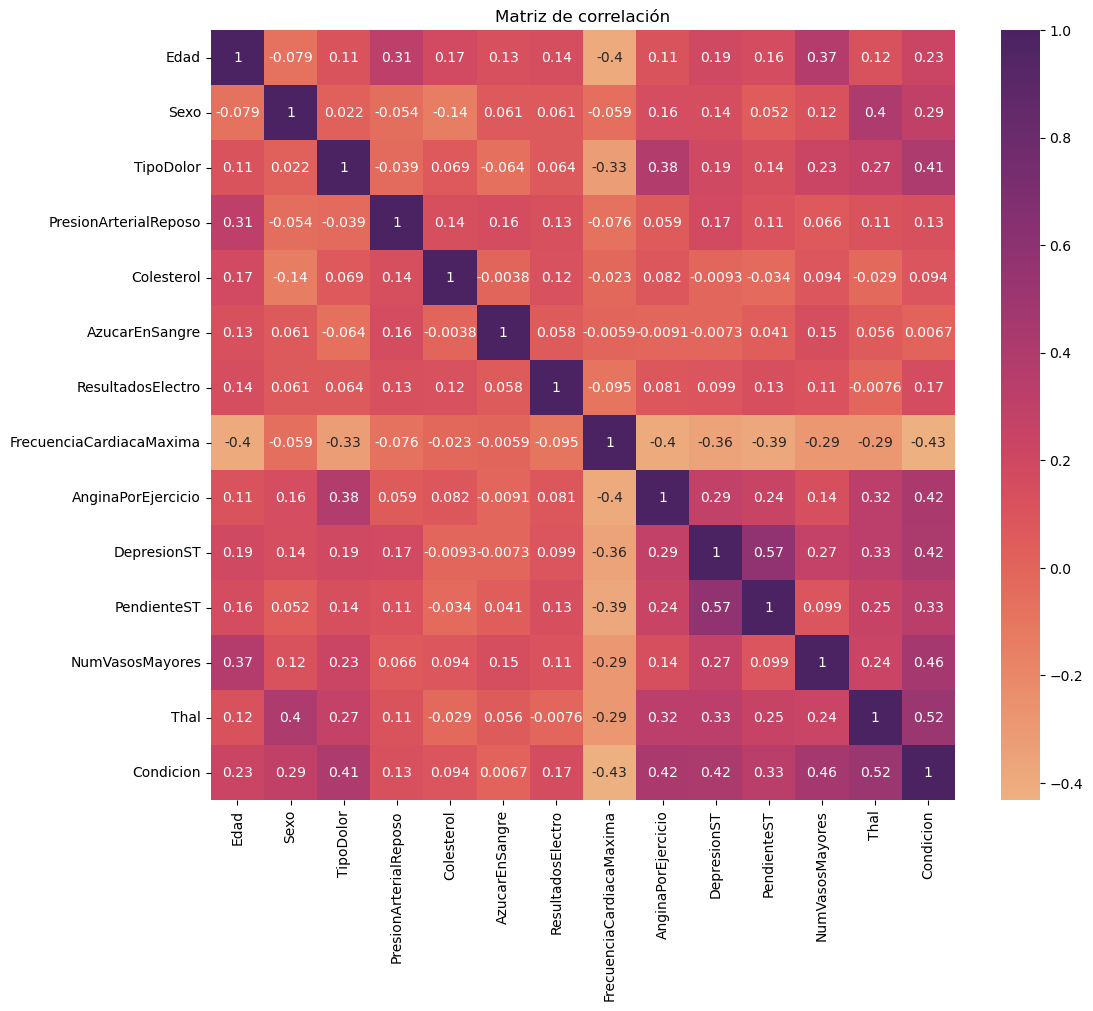

In [27]:
#Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(Datos.corr(), annot=True, cmap='flare')
plt.title('Matriz de correlación')
plt.show()

<h3>Paso 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</h3>

<p>
    Características de intereses:
    <ul> 
        <li>Enfermedad Cardíaca: Si la persona tiene un enfermedad cardíaca o no. (0 = No tiene enfermedad cardíaca y 1 = Si tienen enfermedad cadíaca)
        </li>
        <li>Predecir si una persona puede tener una enfermedad cardíaca.
        </li>
    </ul>
</p>

In [28]:
# Total de personas con enfermedad cardíaca

Datos['Condicion'].value_counts()

0    158
1    132
Name: Condicion, dtype: int64

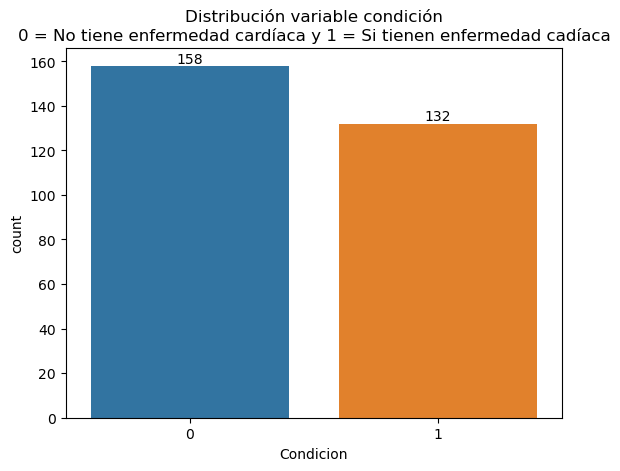

In [37]:
# Distribución gráfica para la variable condicion

sns.countplot(x='Condicion', data=Datos)
plt.title('Distribución variable condición\n0 = No tiene enfermedad cardíaca y 1 = Si tienen enfermedad cadíaca')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

<h3>Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</h3>

In [38]:
#Porcentaje de datos para entrenamiento (train) = 75% y para pruebe (test) = 25%

#Declarar variables

X = Datos.drop('Condicion', axis=1)
Y = Datos['Condicion']

#División del conjunto de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

In [39]:
print (X_train)

     Edad  Sexo  TipoDolor  PresionArterialReposo  Colesterol  AzucarEnSangre  \
131    48     1          2                    124         255               1   
142    43     0          2                    122         213               0   
246    54     1          3                    110         239               0   
173    65     1          3                    110         248               0   
54     46     1          1                    101         197               1   
..    ...   ...        ...                    ...         ...             ...   
172    65     1          3                    120         177               0   
170    65     0          3                    150         225               0   
76     68     1          2                    180         274               1   
240    55     1          3                    132         353               0   
233    57     1          3                    132         207               0   

     ResultadosElectro  Fre

In [40]:
print (Y_train)

131    0
142    0
246    1
173    1
54     0
      ..
172    0
170    1
76     1
240    1
233    0
Name: Condicion, Length: 217, dtype: int64


<h3>Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.</h3>

In [43]:
#Construir modelo de regresión logística

Regresion_UCI = LogisticRegression(solver = "liblinear")
Regresion_UCI.fit (X_train, Y_train)

#Crear modelo de predicción

Prediccion = Regresion_UCI.predict(X_test)

In [44]:
print (Y_test)

136    1
63     0
155    1
216    1
112    0
      ..
98     1
14     0
113    0
195    1
150    0
Name: Condicion, Length: 73, dtype: int64


In [45]:
print (Prediccion)

[0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0]


<h3>Paso 6. Evaluar el desempeño del modelo en conjunto de Test con métricas como precisión, recall, F1 – score, etc.</h3>

In [47]:
#Evaluar desempeño

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.96      0.82      0.89        33

    accuracy                           0.90        73
   macro avg       0.92      0.90      0.90        73
weighted avg       0.91      0.90      0.90        73



<h3>Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</h3>

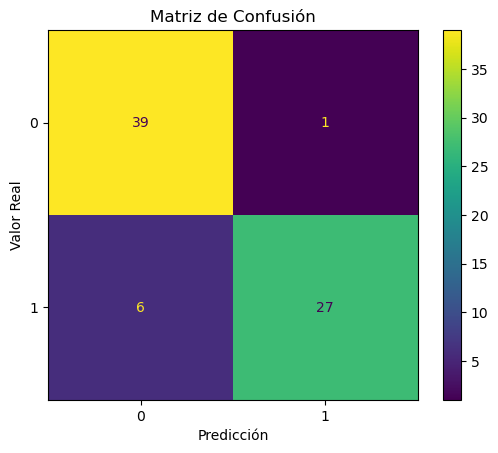

In [61]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

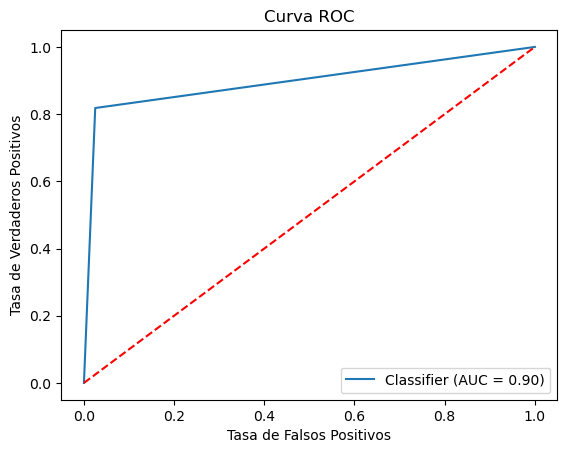

In [65]:
# Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Modelo aleatorio')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

plt.show()